In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
# load image
# reshape image from 3D (h,w,channels) to 2D array (hxw, channels)
# initial centroid function
# k means algorithm
# perhaps plot and show the channels with centroids
# find closest centroid for each pixel
# X new array with closest centroids replacing each pixel
# reshape back to original image
# display using plt

(183, 275, 3)


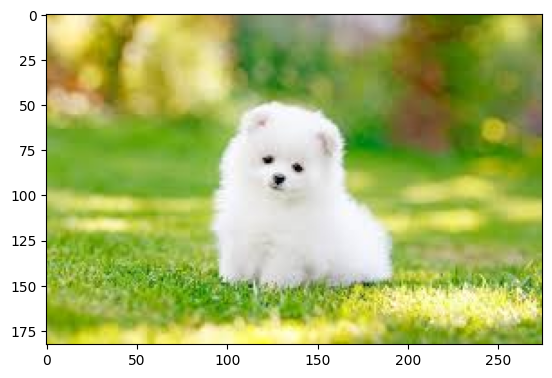

In [109]:
pup = plt.imread("/content/pup.jpeg")
plt.imshow(pup)
print(pup.shape)

In [110]:
pup_reshaped = pup.reshape(pup.shape[0]*pup.shape[1],3)
print(pup_reshaped.shape)

(50325, 3)


In [111]:
# initial centroids function
def k_means_initial_centroids(X, K):
  randidx = np.random.permutation(X.shape[0]) # random numbers generated that are within the range of training examples (50325)
  # print(randidx) # just checking
  centroids = X[randidx[:K]] # selects K X training example based on K indices from randidx
  return centroids

In [112]:
# find_closest_centroids
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    m = X.shape[0] # m is the no. of training examples
    idx = np.zeros(m, dtype=int) # this array will store for each data point the index of the closer centroid

    for i in range(m):
        distances = np.zeros(K)
        for k in range(K):
            distances[k] = np.linalg.norm(X[i]-centroids[k])
        idx[i] = np.argmin(distances)

    return idx

In [113]:
# compute_centroids
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
        points = X[idx==k] # m2,n
        c_k = points.shape[0] # m2
        if c_k>0:
            sum_points = np.sum(points, axis=0)
            new_centroid = sum_points/c_k
            centroids[k] = new_centroid
    return centroids

In [114]:
def run_kmeans(X, initial_centroids, max_iters=10):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m)

    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

In [115]:
init_centroids = k_means_initial_centroids(pup_reshaped, 16) # initial assumption
print(init_centroids.shape[0])

16


In [116]:
centroids, idx = run_kmeans(pup_reshaped, init_centroids, 10)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [117]:
idx = find_closest_centroids(pup_reshaped, centroids)
pup_compressed = centroids[idx, :]
pup_compressed = np.reshape(pup_compressed, pup.shape)

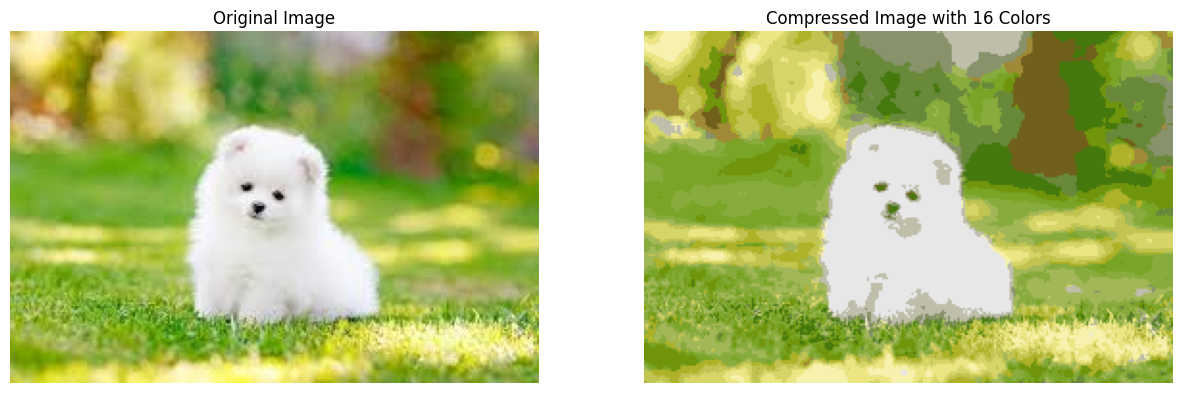

In [123]:
# Clip the values of pup_compressed to be between 0 and 255
pup_compressed_clipped = np.clip(pup_compressed, 0, 255)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(pup.astype('uint8'))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pup_compressed_clipped.astype(int))
plt.title("Compressed Image with 16 Colors")
plt.axis('off')
plt.show()


In [124]:
# Scikit Learn Model
from sklearn.cluster import KMeans

In [125]:
n_colors = 16  # Number of colors for compression
kmeans = KMeans(n_clusters=n_colors, random_state=42)
kmeans.fit(pup_reshaped)

KMeans(n_clusters=16, random_state=42)

In [129]:
pup_compressed2 = kmeans.cluster_centers_[kmeans.labels_]
pup_compressed2 = np.clip(pup_compressed2, 0, 255)  # Ensure valid RGB values
pup_compressed2 = np.reshape(pup_compressed2, pup.shape)

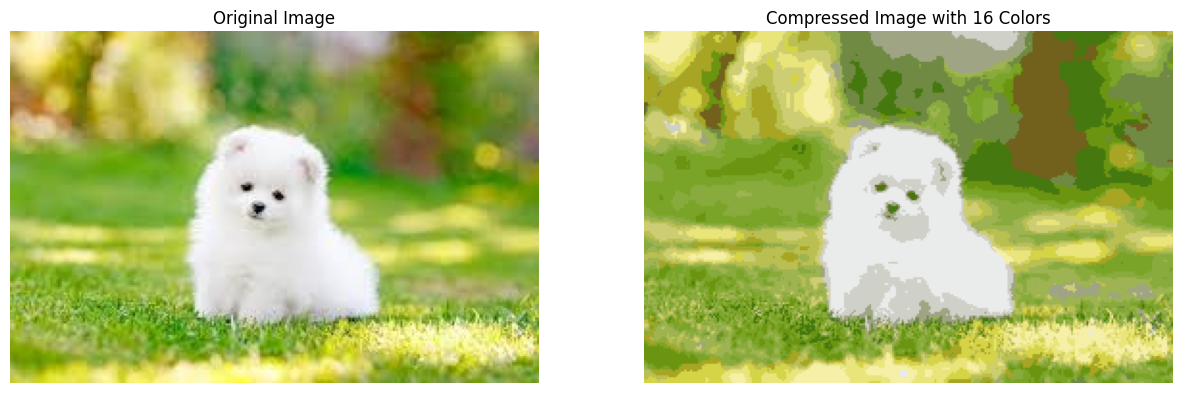

In [130]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(pup.astype('uint8'))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pup_compressed2.astype('uint8'))
plt.title("Compressed Image with 16 Colors")
plt.axis('off')
plt.show()